# Some documentation regarding the CCDdata object and fits handling

In [25]:
from astropy.stats import mad_std
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc as ccdp
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [26]:
from astropy.io import fits

# Open the FITS file
with fits.open("/Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0002_lrp.fit") as hdul:
    # Access the header of the primary HDU (usually the first one)
    header = hdul[0].header
    # Print the entire header
    print(header)

SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 4096 /fastest changing axis                           NAXIS2  =                 4096 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2024-09-05T03:01:40.78' /YYYY-MM-DDThh:mm:ss observation, UT         EXPTIME =   240.00000000000000 /Exposure time in seconds                        EXPOSURE=   240.00000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -19.937500000000000 /CCD temperature at start of exposure in C       XPIXSZ  =   9.0000000000000000 /Pixel Wi

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 4096                                                  NAXIS2  =                 4096                                                  EXTEND  =                    T                                                  DATE-OBS= '2024-09-05T02:57:27.46' / ISO-8601 time of observation               EXPTIME =   240.00000000000000 /Exposure time in seconds                        EXPOSURE=   240.00000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -19.968750000000000 /CCD temperature at start of exposure in C       XP

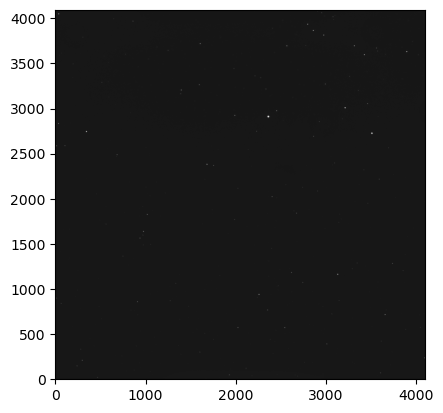

In [27]:
files = ccdp.ImageFileCollection('/Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/test_output')
light_file = files.files_filtered(imagetyp = 'Light Frame', include_path=True)[0]
reduced_light_frame = CCDData.read(light_file, unit=u.adu)
reduced_light_frame.meta['EPOCH'] = 2000.0
print(reduced_light_frame.meta)
plt.imshow(reduced_light_frame.data,cmap='Greys_r', origin='lower')

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


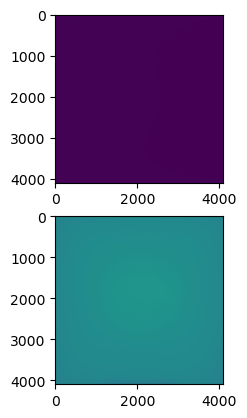

In [28]:
files = ccdp.ImageFileCollection('/Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/master_frames_test')

mbias_file = files.files_filtered(include_path=True)[0]
mflat_file = files.files_filtered(include_path=True)[1]

mbias = CCDData.read(mbias_file, unit=u.adu)
mflat = CCDData.read(mflat_file, unit=u.adu)

fig, axs = plt.subplots(2)
axs[0].imshow(mbias.data)
axs[1].imshow(mflat.data)

# Quick verification of the current master flats and biases:

combining bias ...
reading bias: 1 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0001_bias.fit
reading bias: 2 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0002_bias.fit
reading bias: 3 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0003_bias.fit
reading bias: 4 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0004_bias.fit
reading bias: 5 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0005_bias.fit
reading bias: 6 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0006_bias.fit
reading bias: 7 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0007_bias.fit
reading bias: 8 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0008_bias.fit
reading bias: 9 11 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0009_

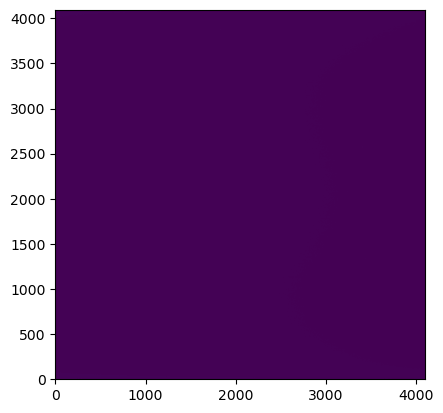

In [29]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

import glob
bfiles=glob.glob("/Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/*bias*")
bfiles.sort()
allbias=[]

print("combining bias ...")
for i,ifile in enumerate(bfiles):
    print("reading bias:", i+1,len(bfiles),ifile)
    data=fits.getdata(ifile)
    allbias.append(data)
    
allbias=np.stack(allbias)
print(allbias.shape)
superbias=np.median(allbias,axis=0)
superbias = superbias.astype('float32')
plt.imshow(superbias,origin='lower')

In [30]:
ffiles=glob.glob("/Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/*frp*")
ffiles.sort()
allflat=[]
print("combining dome flats...")
for i,ifile in enumerate(ffiles):
    print("reading flat:", i+1,len(ffiles),ifile)
    # flat-fielding: subtract bias and then normalize the flat images
    data=fits.getdata(ifile)-superbias
    mflat=np.median(data[1500-256:1500+256,1500-256:1500+256])
    data/=mflat
    print("median flat:",mflat)
    allflat.append(data)
allflat=np.stack(allflat)
print(allflat.shape)

domeflat=np.median(allflat,axis=0)
domeflat=domeflat.astype('float32')

combining dome flats...
reading flat: 1 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0002_frp.fit
median flat: 28732.0
reading flat: 2 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0003_frp.fit
median flat: 28773.0
reading flat: 3 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0005_frp.fit
median flat: 28778.0
reading flat: 4 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0006_frp.fit
median flat: 28775.0
reading flat: 5 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0007_frp.fit
median flat: 28771.0
reading flat: 6 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0008_frp.fit
median flat: 28770.0
reading flat: 7 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipeline/test_input/Qatar-5b-0009_frp.fit
median flat: 28785.0
reading flat: 8 9 /Users/spencerfreeman/Desktop/PersonalCS/CurrentPipelin

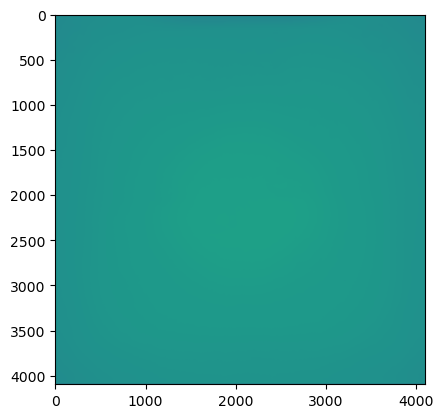

In [31]:
plt.imshow(domeflat)

# Gain and Readout Noise (from et_schmidt_datareduction): come back to this step if it proves neccessary.